# introCatboost

Interactive examples from Kaggle for:
* Regression - Using [Ad Demand Prediction](https://www.kaggle.com/nicapotato/simple-catboost)
* Classification - using Titanic

## Regression
The first example deals regressing an ad's success using various variables provided in a Kaggle competition:

The primary is discering a good ad from a poor one:
![](https://storage.googleapis.com/kaggle-media/competitions/Avito/product_description_qualities_2.png)

To understand, we implement the solution proposed [here](https://www.kaggle.com/nicapotato/simple-catboost).

In [4]:

# import time
# notebookstart= time.time()

In [17]:
# Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Data
import pandas as pd
import numpy as np

Next, we ingest the data provided from Kaggle (may not be available in repo as per Kaggle regulations.)

In [35]:

# Ingest Kaggle Data
training_df = pd.read_csv('data/Regression/train.csv.zip',
            compression='zip',
            index_col = "item_id",
            parse_dates = ["activation_date"]) #.sample(5000) # TODO Drop sample when doing final test

testing_df = pd.read_csv('data/Regression/train.csv.zip',
            compression='zip',
            index_col = "item_id",
            parse_dates = ["activation_date"])# .sample(5000) # TODO Drop sample when doing final test

traindex, testdex = training.index, testing.index

training_df.describe()
# testing_df.describe()

,price,item_seq_number,image_top_1,deal_probability
count,1.418062e+06,1.503424e+06,1.390836e+06,1.503424e+06
mean,3.167081e+05,7.436740e+02,1.241932e+03,1.391306e-01
std,6.689154e+07,5.572522e+03,9.704641e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,7.000000e+03,8.800000e+01,2.217000e+03,1.508700e-01
max,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


# Visualization

An exploration of the data, with pieces borrowed from[ this notebook.](https://www.kaggle.com/shivamb/in-depth-analysis-visualisations-avito/notebook)

First, we prepare a seperate visualization dataset.

In [36]:
visualization_df = training.copy()

Next, we engineer some useful features:

# date time features
visualization_df['weekday'] = visualization_df.activation_date.dt.weekday
visualization_df['month'] = visualization_df.activation_date.dt.month
visualization_df['day'] = visualization_df.activation_date.dt.day
visualization_df['week'] = visualization_df.activation_date.dt.week

# length of description
visualization_df['description'] = visualization_df['description'].fillna(" ")
visualization_df['description_len'] = visualization_df['description'].apply(lambda x : len(x.split()))

# length of title
visualization_df['title'] = visualization_df['title'].fillna(" ")
visualization_df['title_len'] = visualization_df['title'].apply(lambda x : len(x.split()))

# param_combined and its length
visualization_df['param_combined'] = visualization_df.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
visualization_df['param_combined'] = visualization_df['param_combined'].fillna(" ")
visualization_df['param_combined_len'] = visualization_df['param_combined'].apply(lambda x : len(x.split()))

# charater len of text columns
visualization_df['description_char'] = visualization_df['description'].apply(len)
visualization_df['title_char'] = visualization_df['title'].apply(len)
visualization_df['param_char'] = visualization_df['param_combined'].apply(len)

# total period for which ads were run
pr_train['total_period'] = pr_train['date_to'] - pr_train['date_from']

# english mapped of weekday
daymap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
visualization_df['weekday_en'] = visualization_df['weekday'].apply(lambda x : daymap[x])

# bins of deal probability
interval = (-0.99, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.1)
cats = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9','0.9-1.0']
visualization_df['deal_class'] = visualization_df['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
visualization_df["deal_class_2"] = pd.cut(visualization_df.deal_probability, interval, labels=cats)


In [39]:

# 2. feature engineering

# date time features
visualization_df['weekday'] = visualization_df.activation_date.dt.weekday
visualization_df['month'] = visualization_df.activation_date.dt.month
visualization_df['day'] = visualization_df.activation_date.dt.day
visualization_df['week'] = visualization_df.activation_date.dt.week

# length of description
visualization_df['description'] = visualization_df['description'].fillna(" ")
visualization_df['description_len'] = visualization_df['description'].apply(lambda x : len(x.split()))

# length of title
visualization_df['title'] = visualization_df['title'].fillna(" ")
visualization_df['title_len'] = visualization_df['title'].apply(lambda x : len(x.split()))

# param_combined and its length
visualization_df['param_combined'] = visualization_df.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
visualization_df['param_combined'] = visualization_df['param_combined'].fillna(" ")
visualization_df['param_combined_len'] = visualization_df['param_combined'].apply(lambda x : len(x.split()))

# charater len of text columns
visualization_df['description_char'] = visualization_df['description'].apply(len)
visualization_df['title_char'] = visualization_df['title'].apply(len)
visualization_df['param_char'] = visualization_df['param_combined'].apply(len)

# total period for which ads were run
pr_train['total_period'] = pr_train['date_to'] - pr_train['date_from']

# english mapped of weekday
daymap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
visualization_df['weekday_en'] = visualization_df['weekday'].apply(lambda x : daymap[x])

# bins of deal probability
interval = (-0.99, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.1)
cats = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9','0.9-1.0']
visualization_df['deal_class'] = visualization_df['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
train_df["deal_class_2"] = pd.cut(train_df.deal_probability, interval, labels=cats)

NameError: name 'pr_train' is not defined

NameError: name 'pr_train' is not defined

NameError: name 'pr_train' is not defined

In [32]:
# Define Maps
#parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

# Apply Maps
train_df['region_en'] = train_df['region'].apply(lambda x : region_map[x])
train_df['parent_category_name_en'] = train_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_df['category_name_en'] = train_df['category_name'].apply(lambda x : category_map[x])

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

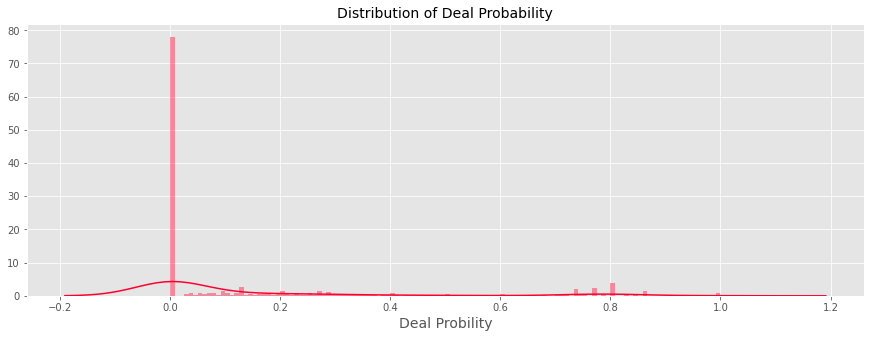

In [13]:
def generate_histogram_plot(df, col, title):
    trace = go.Histogram(x = df[col])
    layout = go.Layout(title=title, legend=dict(orientation="h"), height=400)
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)


# generate_histogram_plot(train_df, 'deal_probability', 'Distribution of Deal Probability')
plt.figure(figsize=(15,5))
sns.distplot(training["deal_probability"].values, bins=120, color="#ff002e")
plt.xlabel('Deal Probility', fontsize=14);
plt.title("Distribution of Deal Probability", fontsize=14);
plt.show();


## Deal Probability Distribution

**Inference**
> - From the deal probability distribution graph, it is clear that majority of the items have exteremely low deal probability, ie. about 78%, while very few values have the deal probability of 0.7 or larger.
> - A very small tower is observed near the deal probability of 1.0, indicating that there are some items in the dataset having very high value of deal probability.

**Top 10 Items having deal probability  = 1.0 are**
> - 92013ca1fe79 | Installation of doors, openings, slopes, arches
> - c6239fc67a6f | Nail extension, correction
> - 44aa121e4559 | Cargo transportation (long distance), onboard, open
> - b16d1b27c975 | Rise of houses
> - fe03dbc60ccf | Transportation across the southern Federal district North Caucasian Federal district Crimea


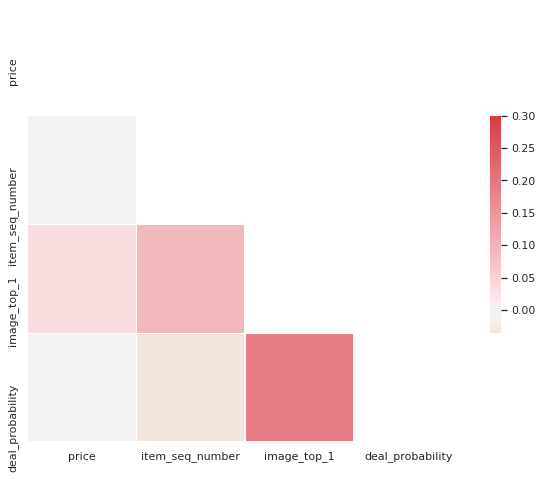

In [29]:

corr = training.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(30, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5});


## Correlation

> - From the correlation graph, Deal probability shows good correlation with description len and title len. These may by important features while modelling.
> - Item Seq Number is also correlated mildly with title len, description len, and Image Top 1
> - Image Top 1 code shows a good correlation with deal probability and length of title and description

In [30]:
training['price_log'] = np.log(training['price'] + 1)

sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.boxplot(x='deal_class_2', y='price_log', data=training, palette="RdBu")
g.set_xlabel('The Deal Probability Class',fontsize=12)
g.set_ylabel('Log of Price',fontsize=12)
plt.show()

ValueError: Could not interpret input 'deal_class_2'

## Log Prices

> - Items having Low deal probabilities have lower log price while its slightly higher for items having deal probability about 0.5

In [27]:

cols = ['parent_category_name_en','deal_class_2']
colmap = sns.light_palette("#ff4284", as_cmap=True)
pd.crosstab(training[cols[0]], training[cols[1]]).style.background_gradient(cmap = colmap)


KeyError: 'parent_category_name_en'

## Parent Category vs Deal

> - A large number of Consumer Electronics items have high deal probabiliy (0.7 - 0.8), Personal Belongings category which dominates the dataset also contains higher number of items having deal probability close to 1.0
> - Home and Garden related category also contains items having high deal probability.
> - Only services category has the items having deal probability greater than 0.9

In [ ]:
print("\nData Load Stage")
training = pd.read_csv('../input/train.csv', index_col = "item_id", parse_dates = ["activation_date"])#.sample(1000)
traindex = training.index

testing = pd.read_csv('../input/test.csv', index_col = "item_id", parse_dates = ["activation_date"])#.sample(1000)
testdex = testing.index


In [ ]:

fig, axarr = plt.subplots(2, 2, figsize=(14, 7))

def get_venn(axarr, feature):
    axarr[0, 0].set_title(f'Overlap between {feature} in train and train_active')
    venn2([
        set(train[feature].values),
        set(train_active[feature].values)
    ], set_labels = ('train', 'train_active'), ax=axarr[0, 0])

    axarr[0, 1].set_title(f'Overlap between {feature} in test and test_active')
    venn2([
        set(test[feature].values),
        set(test_active[feature].values)
    ], set_labels = ('test', 'test_active'), ax=axarr[0, 1])

    axarr[1, 0].set_title(f'Overlap between {feature} in train and test')
    venn2([
        set(train[feature].values),
        set(test[feature].values)
    ], set_labels = ('train', 'test'), ax=axarr[1, 0])

    axarr[1, 1].set_title(f'Overlap between {feature} in train_active and test_active')
    venn2([
        set(train_active[feature].values),
        set(test_active[feature].values)
    ], set_labels = ('train_active', 'test_active'), ax=axarr[1, 1])

get_venn(axarr, 'user_id')



In [ ]:
y = training.deal_probability.copy()
training.drop("deal_probability",axis=1, inplace=True)

print('Train shape: {} Rows, {} Columns'.format(*training.shape))
print('Test shape: {} Rows, {} Columns'.format(*testing.shape))

In [ ]:
# Combine Train and Test
df = pd.concat([training,testing],axis=0)
del training, testing
gc.collect()
print('\nAll Data shape: {} Rows, {} Columns'.format(*df.shape))

## Feature Engineering

In [ ]:
print("Feature Engineering")
df["price"] = np.log(df["price"]+0.001)
df["price"].fillna(-999,inplace=True)
df["image_top_1"].fillna(-999,inplace=True)
print("\nCreate Time Variables")
df["Weekday"] = df['activation_date'].dt.weekday
df["Weekd of Year"] = df['activation_date'].dt.week
df["Day of Month"] = df['activation_date'].dt.day

# Remove Dead Variables
df.drop(["activation_date","image"],axis=1,inplace=True)

print("\nEncode Variables")
categorical = ["user_id","region","city","parent_category_name","category_name","item_seq_number","user_type","image_top_1"]
messy_categorical = ["param_1","param_2","param_3","title","description"] # Need to find better technique for these
print("Encoding :",categorical + messy_categorical)

# Encoder:
lbl = preprocessing.LabelEncoder()
for col in categorical + messy_categorical:
    df[col] = lbl.fit_transform(df[col].astype(str))


In [ ]:
print("\nCatboost Modeling Stage")
X = df.loc[traindex,:].copy()
print("Training Set shape",X.shape)
test = df.loc[testdex,:].copy()
print("Submission Set Shape: {} Rows, {} Columns".format(*test.shape))
del df
gc.collect()
# Training and Validation Set
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.10, random_state=23)
# Prepare Categorical Variables
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]
categorical_features_pos = column_index(X,categorical + messy_categorical)

# Train Model
print("Train CatBoost Decision Tree")
modelstart= time.time()
cb_model = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train, y_train,
             eval_set=(X_valid,y_valid),
             cat_features=categorical_features_pos,
             use_best_model=True,
             verbose=True)


In [ ]:
# # Feature Importance
# fea_imp = pd.DataFrame({'imp': cb_model.feature_importances_, 'col': X.columns})
# fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
# _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
# plt.savefig('catboost_feature_importance.png')


In [ ]:
print("Model Evaluation Stage")
print(cb_model.get_params())
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, cb_model.predict(X_valid))))
catpred = cb_model.predict(test)
catsub = pd.DataFrame(catpred,columns=["deal_probability"],index=testdex)
catsub['deal_probability'].clip(0.0, 1.0, inplace=True)
catsub.to_csv("catsub.csv",index=True,header=True) # Between 0 and 1
print("Model Runtime: %0.2f Minutes"%((time.time() - modelstart)/60))
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))